## Emma Duncan - 7198831

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### 1.
Tridiagonal solver takes tridiagonal matrix, A, and column matrix, b, to solve for x

In [2]:
def tridiag(A,b):
    n = len(A)
    U = np.zeros((n,n))
    L = np.zeros((n,n))
    y = np.zeros((n,1))
    x = np.zeros((n,1))
    U[0][0] = A[0][0]
    for j in range (0,n-1):
        L[j+1][j] = A[j+1][j]/U[j][j]
        U[j+1][j+1] = (A[j+1][j+1])-(L[j+1][j]*A[j][j+1])
        U[j][j+1] = A[j][j+1]
        L[j][j] = 1
    L[n-1][n-1]=1
    y[0][0] = b[0][0]
    for i in range (1,n):
        y[i][0] = b[i][0] - L[i][i-1]*y[i-1][0]     
    x[n-1][0]=y[n-1][0]/U[n-1][n-1]
    for k in range (n-2,-1,-1):
        x[k][0] = (y[k][0]-A[k][k+1]*x[k+1][0])/U[k][k]
    return(x)     

This is my test case for the code

In [3]:
A = np.array([[-2,1,0,0],[1,-2,1,0],[0,1,-2,1],[0,0,1,-2]])
b = np.array([[0.04],[0.04],[0.04],[0.04]])

In [4]:
tridiag(A,b)

array([[-0.08],
       [-0.12],
       [-0.12],
       [-0.08]])

### 2a.

The function approx(N) approximates given function for N nodes and plugs into tridiagonal solver.

In [5]:
def approx(N):
    M = np.zeros((N+1,N+1))
    b = np.zeros((N+1,1))
    h = 1/N
    M[0][0]=1 
    M[N][N]=1
    for i in range(1,N):
        M[i][i-1] = -1/(h**2)
        M[i][i] = (2/(h**2))+(math.pi**2)
        M[i][i+1] = -1/(h**2)
        b[i][0] = 2*(math.pi**2)*math.sin(math.pi*(i/N))
    return(tridiag(M,b))

solve for N = 50

In [6]:
approx(50)

array([[ 0.        ],
       [ 0.06280085],
       [ 0.12535385],
       [ 0.18741214],
       [ 0.2487308 ],
       [ 0.30906783],
       [ 0.36818511],
       [ 0.42584933],
       [ 0.48183292],
       [ 0.53591494],
       [ 0.58788194],
       [ 0.63752885],
       [ 0.68465971],
       [ 0.72908854],
       [ 0.77063999],
       [ 0.80915008],
       [ 0.84446682],
       [ 0.87645083],
       [ 0.9049759 ],
       [ 0.92992943],
       [ 0.95121296],
       [ 0.96874249],
       [ 0.98244884],
       [ 0.9922779 ],
       [ 0.9981909 ],
       [ 1.0001645 ],
       [ 0.9981909 ],
       [ 0.9922779 ],
       [ 0.98244884],
       [ 0.96874249],
       [ 0.95121296],
       [ 0.92992943],
       [ 0.9049759 ],
       [ 0.87645083],
       [ 0.84446682],
       [ 0.80915008],
       [ 0.77063999],
       [ 0.72908854],
       [ 0.68465971],
       [ 0.63752885],
       [ 0.58788194],
       [ 0.53591494],
       [ 0.48183292],
       [ 0.42584933],
       [ 0.36818511],
       [ 0

Plot $v_{j}$ points from the output 

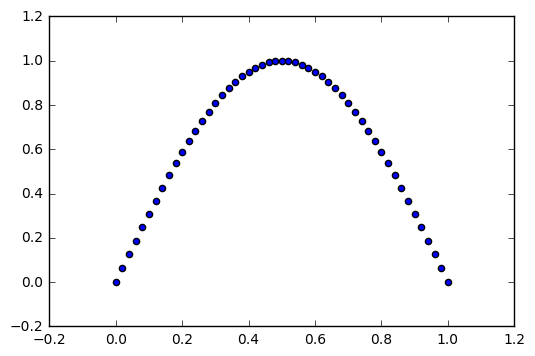

In [7]:
x = np.zeros((51,1))
for i in range (0,51):
    x[i][0] = i/50
    
b = plt.scatter(x,approx(50))

plt.show(b)

This graph looks very similar to the sine curve we are trying to approximate, to confirm we graph the actual below.

### 2b.
Scatter plot of output with graph of $u(x) = \sin(\pi x)$, in red

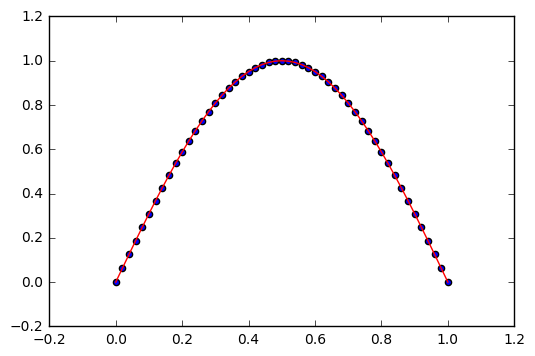

In [8]:
b = plt.scatter(x,approx(50))

y = np.zeros((51,1))
for i in range(0,51):
    y[i][0] = math.sin(math.pi*x[i][0])
a = plt.plot(x, y, 'r')
plt.show()

This graph is nearly identical to our approximated points.

### 2c. 

We calculate error as $error = |actual - approx|$ for each x-node, and then sum all errors to compare for $N=50$ and $N=100$

The error with N=100 should be approximately half the size of the error with N=50

In [9]:
def err(ap, ac):
    N = len(ap) 
    error = 0
    for i in range(0,N):
        error += math.fabs(ap[i][0]-ac[i][0])
    return(error)

x2 = np.zeros((101,1))
for i in range (0,101):
    x2[i][0] = i/100
y2 = np.zeros((101,1))
for i in range(0,101):
    y2[i][0] = math.sin(math.pi*x2[i][0])

print("error with N=50:", err(approx(50),y),", error with N=100:",err(approx(100),y2))

error with N=50: 0.005234437235622194 , error with N=100: 0.002617800079649628


It is clear that more nodes produces an error approximately half the size, as predicted.

### 2d. 

When you do not know the exact solution, you can check the convergence through fixed point iterations. By choosing a tolerance and comparing your errors, you can find the convergence when your error is less than the tolerance.

In [10]:
approx(100)

array([[ 0.        ],
       [ 0.03141205],
       [ 0.0627931 ],
       [ 0.09411218],
       [ 0.12533839],
       [ 0.1564409 ],
       [ 0.18738902],
       [ 0.21815221],
       [ 0.24870011],
       [ 0.27900258],
       [ 0.3090297 ],
       [ 0.33875185],
       [ 0.36813969],
       [ 0.39716422],
       [ 0.4257968 ],
       [ 0.45400917],
       [ 0.48177349],
       [ 0.50906235],
       [ 0.53584883],
       [ 0.56210649],
       [ 0.58780942],
       [ 0.61293226],
       [ 0.6374502 ],
       [ 0.66133906],
       [ 0.68457526],
       [ 0.70713586],
       [ 0.72899861],
       [ 0.75014192],
       [ 0.77054493],
       [ 0.79018751],
       [ 0.80905026],
       [ 0.82711459],
       [ 0.84436265],
       [ 0.86077742],
       [ 0.87634272],
       [ 0.89104317],
       [ 0.90486426],
       [ 0.91779237],
       [ 0.92981472],
       [ 0.94091946],
       [ 0.95109563],
       [ 0.96033318],
       [ 0.96862299],
       [ 0.9759569 ],
       [ 0.98232765],
       [ 0